## Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Creating Model Class

In [2]:
class Model(nn.Module):
    def __init__(self, in_features=4, hidden_layer_1=8, hidden_layer_2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, hidden_layer_1)
        self.fc2 = nn.Linear(hidden_layer_1, hidden_layer_2)
        self.out = nn.Linear(hidden_layer_2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [3]:
torch.manual_seed(32)

model = Model()

## Loading Dataset

In [4]:
df = pd.read_csv('iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


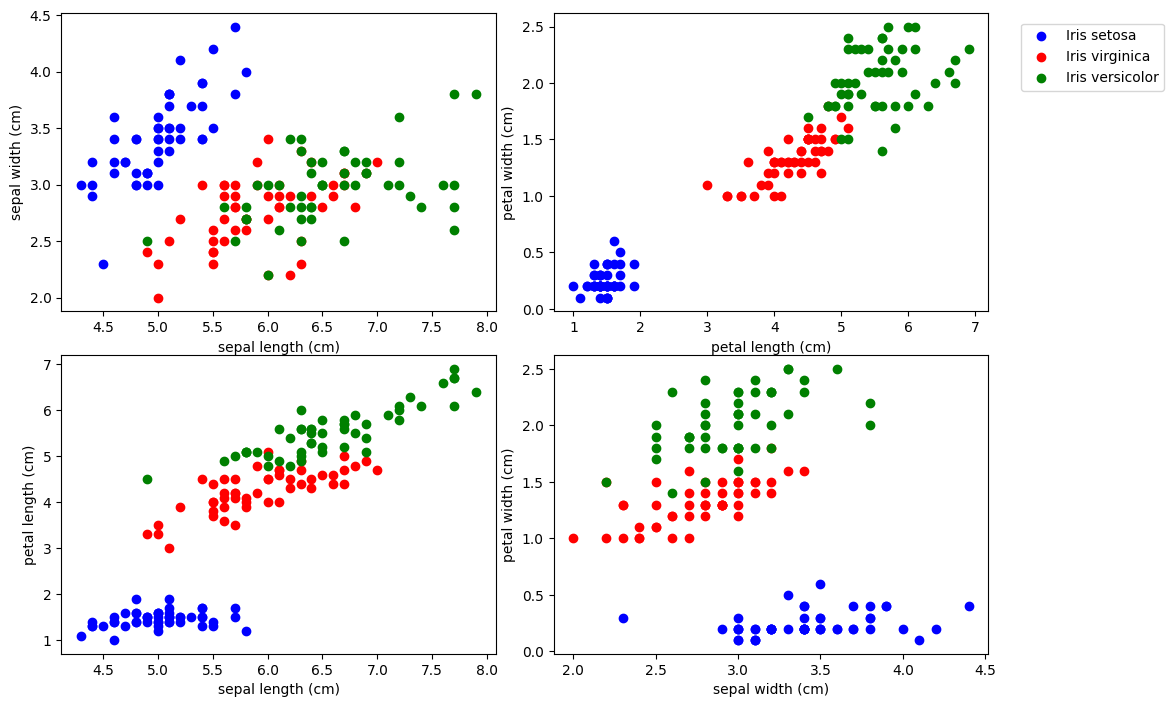

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

## Train Test Split

In [7]:
X = df.drop('target',axis=1).values
y = df['target'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.2,
    random_state=33
)

In [9]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

## Training the Model

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [11]:
epochs = 100
losses = []

for i in range(epochs):
    i += 1

    # Forward Pass
    y_pred = model.forward(X_train)

    # Calculating Loss
    loss = criterion(y_pred, y_train)

    # Recording Error
    losses.append(loss.detach().numpy())

    if i % 10 == 0:
        print(f"epoch is {i} and loss is {loss.item()}")

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch is 10 and loss is 0.9566181898117065
epoch is 20 and loss is 0.7923727631568909
epoch is 30 and loss is 0.6320288777351379
epoch is 40 and loss is 0.4185294806957245
epoch is 50 and loss is 0.2672296166419983
epoch is 60 and loss is 0.15835250914096832
epoch is 70 and loss is 0.104006327688694
epoch is 80 and loss is 0.08255425840616226
epoch is 90 and loss is 0.07298815995454788
epoch is 100 and loss is 0.06756165623664856


Text(0.5, 0, 'Epoch')

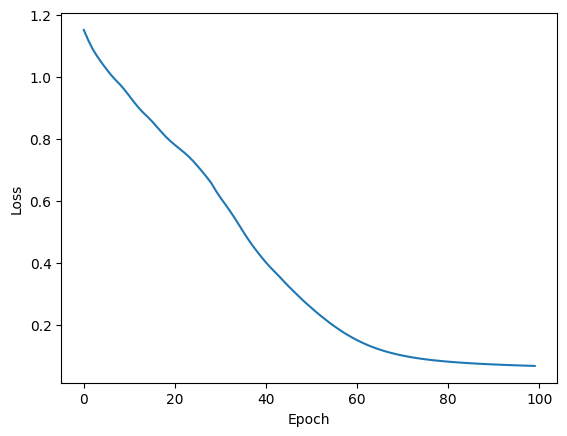

In [12]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")

## Validate the Model

In [13]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [14]:
loss

tensor(0.0581)

In [15]:
correct = 0

with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        # print(f"{i+1}.) {str(y_val)} {y_test[i]}")
        
        print(f"{i+1}.) {str(y_val.argmax().item())} {y_test[i]}")

        if y_val.argmax().item() == y_test[i]:
            correct += 1

print("\n")
print(f"We got {correct} values")

1.) 1 1
2.) 1 1
3.) 0 0
4.) 1 1
5.) 2 2
6.) 2 2
7.) 0 0
8.) 0 0
9.) 2 2
10.) 2 2
11.) 2 2
12.) 0 0
13.) 2 2
14.) 1 1
15.) 2 2
16.) 1 1
17.) 2 2
18.) 0 0
19.) 1 1
20.) 2 2
21.) 0 0
22.) 0 0
23.) 2 2
24.) 0 0
25.) 2 2
26.) 2 2
27.) 1 1
28.) 1 1
29.) 2 2
30.) 2 2


We got 30 values


## Saving the Model

In [16]:
torch.save(model.state_dict(), 'iris_model.pt')

## Loading the Model

In [17]:
new_model = Model()

In [18]:
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [19]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

## Use the Loaded Model

In [20]:
mystery_iris = torch.tensor([5.6, 3.7, 2.2, 0.5])

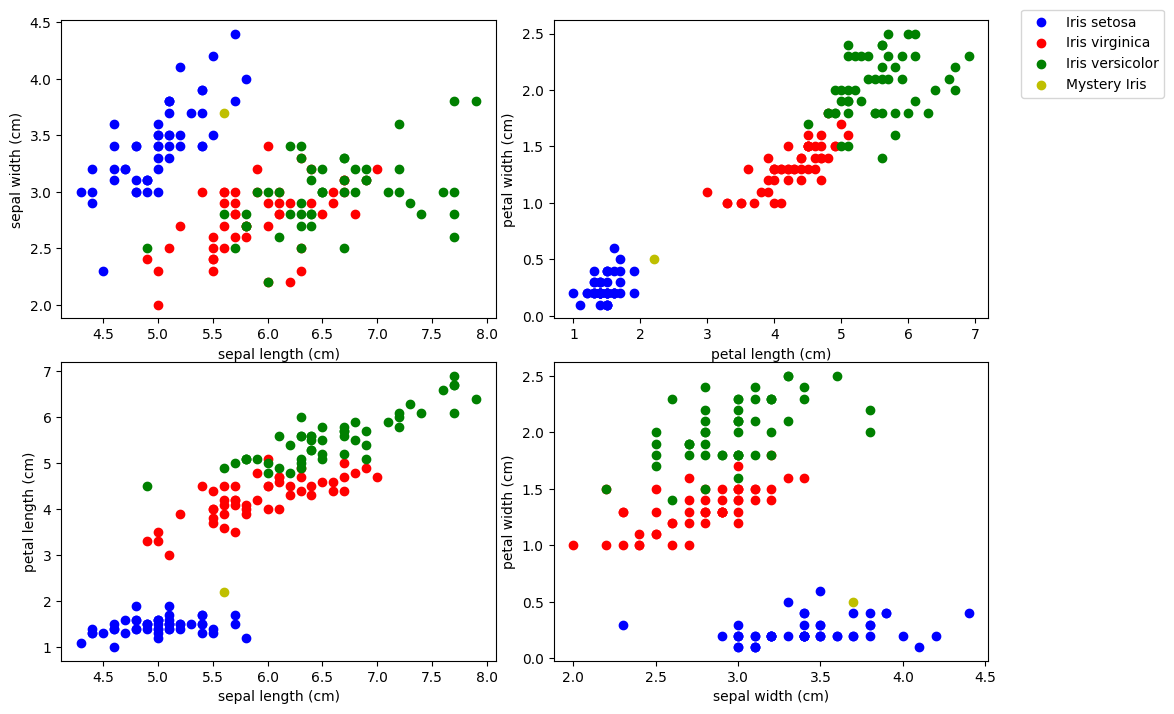

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor', 'Mystery Iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

    # Add a plot for mystery iris
    ax.scatter(mystery_iris[plots[i][0]], mystery_iris[plots[i][1]], color='y')

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [22]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print(new_model(mystery_iris).argmax())

tensor([  5.9522,   1.5596, -10.0054])
tensor(0)
